In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [60]:
df=pd.read_csv('E:\\neo.csv',encoding='latin1')
df.head()

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True


In [61]:
df.tail()

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
90831,3763337,(2016 VX1),0.026580,0.059435,52078.886692,1.230039e+07,Earth,False,25.00,False
90832,3837603,(2019 AD3),0.016771,0.037501,46114.605073,5.432121e+07,Earth,False,26.00,False
90833,54017201,(2020 JP3),0.031956,0.071456,7566.807732,2.840077e+07,Earth,False,24.60,False
90834,54115824,(2021 CN5),0.007321,0.016370,69199.154484,6.869206e+07,Earth,False,27.80,False
90835,54205447,(2021 TW7),0.039862,0.089133,27024.455553,5.977213e+07,Earth,False,24.12,False


In [62]:
print(df.nunique())

id                    27423
name                  27423
est_diameter_min       1638
est_diameter_max       1638
relative_velocity     90828
miss_distance         90536
orbiting_body             1
sentry_object             1
absolute_magnitude     1638
hazardous                 2
dtype: int64


In [5]:
df.describe()

,id,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude
count,9.083600e+04,90836.000000,90836.000000,90836.000000,9.083600e+04,90836.000000
mean,1.438288e+07,0.127432,0.284947,48066.918918,3.706655e+07,23.527103
std,2.087202e+07,0.298511,0.667491,25293.296961,2.235204e+07,2.894086
min,2.000433e+06,0.000609,0.001362,203.346433,6.745533e+03,9.230000
25%,3.448110e+06,0.019256,0.043057,28619.020645,1.721082e+07,21.340000
50%,3.748362e+06,0.048368,0.108153,44190.117890,3.784658e+07,23.700000
75%,3.884023e+06,0.143402,0.320656,62923.604633,5.654900e+07,25.700000
max,5.427591e+07,37.892650,84.730541,236990.128088,7.479865e+07,33.200000


In [3]:
df.shape

(90836, 10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90836 entries, 0 to 90835
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  90836 non-null  int64  
 1   name                90836 non-null  object 
 2   est_diameter_min    90836 non-null  float64
 3   est_diameter_max    90836 non-null  float64
 4   relative_velocity   90836 non-null  float64
 5   miss_distance       90836 non-null  float64
 6   orbiting_body       90836 non-null  object 
 7   sentry_object       90836 non-null  bool   
 8   absolute_magnitude  90836 non-null  float64
 9   hazardous           90836 non-null  bool   
dtypes: bool(2), float64(5), int64(1), object(2)
memory usage: 5.7+ MB


In [7]:
df.isnull().sum()

id                    0
name                  0
est_diameter_min      0
est_diameter_max      0
relative_velocity     0
miss_distance         0
orbiting_body         0
sentry_object         0
absolute_magnitude    0
hazardous             0
dtype: int64

In [63]:
df.drop_duplicates(inplace=True)
df.shape

(90836, 10)

In [8]:
df.dtypes

id                      int64
name                   object
est_diameter_min      float64
est_diameter_max      float64
relative_velocity     float64
miss_distance         float64
orbiting_body          object
sentry_object            bool
absolute_magnitude    float64
hazardous                bool
dtype: object

In [3]:
hazard = df[(df.hazardous =='True')]

In [53]:
hazard1 = df[(df.hazardous == 'True') & (df.absolute_magnitude== '>23.52\n')]
nothazard = df[(df.hazardous == 'False')]
nothazard1 = df[(df.hazardous == 'False') & (df.absolute_magnitude== '>23.52\n')]

In [52]:
df.absolute_magnitude.mean()

23.52710347219164

In [64]:
df.absolute_magnitude.median()

23.7

In [65]:
df.absolute_magnitude.std()

2.8940855069321123

False    0.902682
True     0.097318
Name: hazardous, dtype: float64


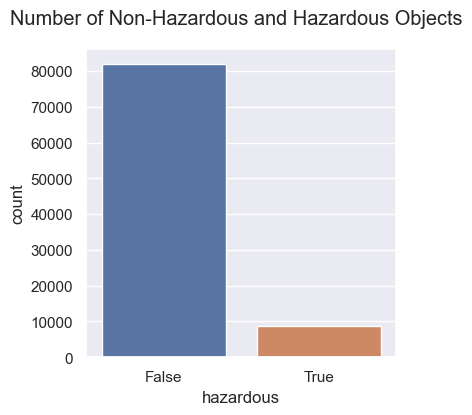

In [63]:
print(df["hazardous"].value_counts() / len(df))
sns.countplot(x='hazardous',data=df)
plt.suptitle('Number of Non-Hazardous and Hazardous Objects')
plt.show()

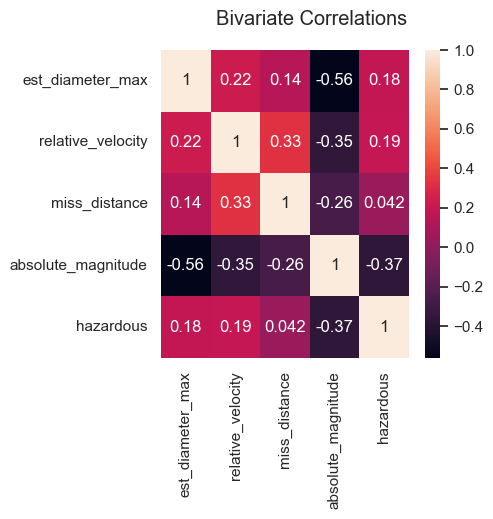

KeyError: "['est_diameter_min'] not found in axis"

In [64]:
sns.heatmap(df.corr(), annot=True)
plt.suptitle('Bivariate Correlations')
plt.show()
df.drop(["est_diameter_min"], axis = 1, inplace = True)

C:\Users\TEMP.DESKTOP-1K68KDN.002\AppData\Local\Temp\ipykernel_3228\669209819.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr().round(2)


<Axes: >

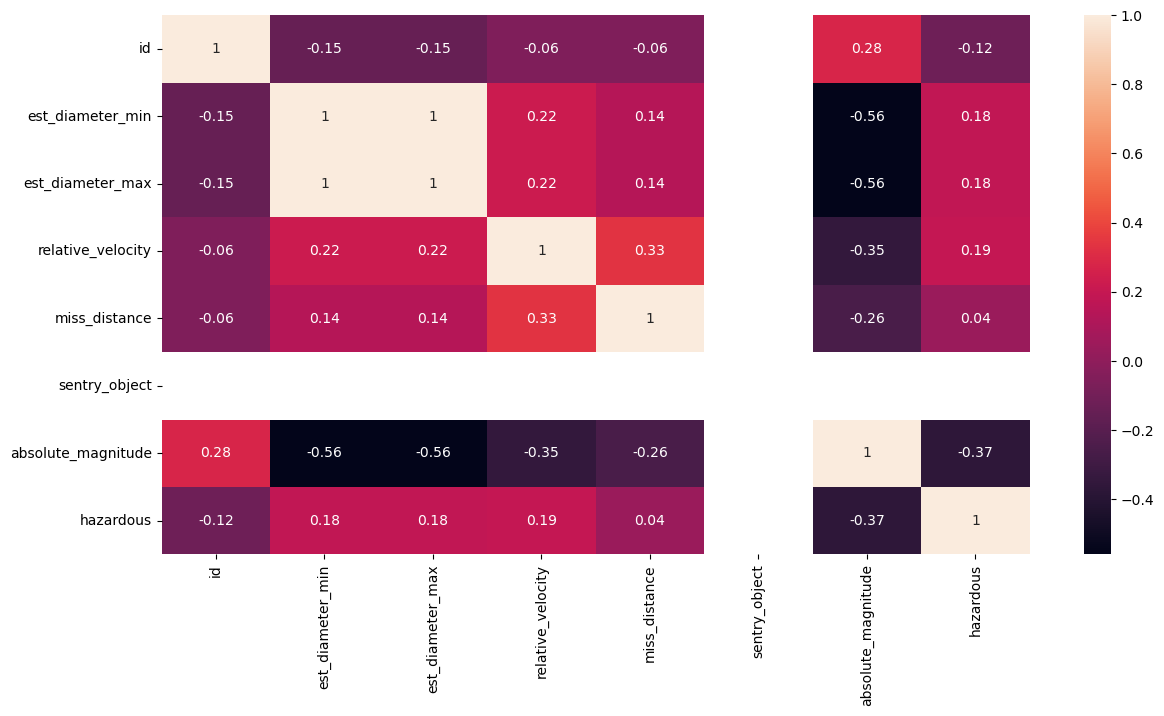

In [10]:
corr = df.corr().round(2)
plt.figure(figsize = (14,7))
sns.heatmap(corr, annot = True)

<Axes: xlabel='hazardous', ylabel='count'>

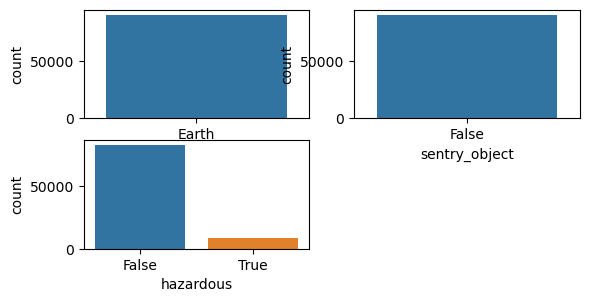

In [4]:
plt.subplot(3,2,1)
sns.countplot(x = 'orbiting_body', data = df)

plt.subplot(3,2,2)
sns.countplot(x = 'sentry_object', data = df)

plt.subplot(3,2,3)
sns.countplot(x = 'hazardous', data = df)

In [7]:
df['orbiting_body'].value_counts()

Earth    90836
Name: orbiting_body, dtype: int64

In [8]:
df['sentry_object'].value_counts()

False    90836
Name: sentry_object, dtype: int64

In [9]:
df['hazardous'].value_counts()

False    81996
True      8840
Name: hazardous, dtype: int64

C:\Users\TEMP.DESKTOP-1K68KDN.002\AppData\Local\Temp\ipykernel_3228\2620132675.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.est_diameter_min, kde = False)
C:\Users\TEMP.DESKTOP-1K68KDN.002\AppData\Local\Temp\ipykernel_3228\2620132675.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(

<Axes: xlabel='absolute_magnitude'>

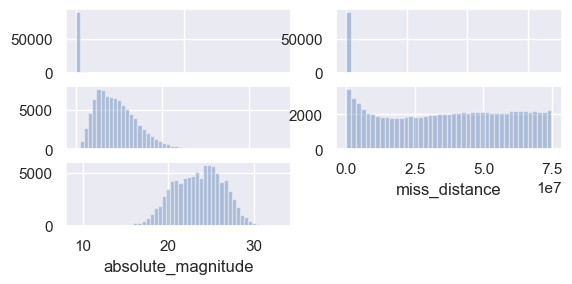

In [16]:
plt.figure()

sns.set(color_codes = True)

plt.subplot(5,2,1)
sns.distplot(df.est_diameter_min, kde = False)

plt.subplot(5,2,2)
sns.distplot(df.est_diameter_max, kde = False)

plt.subplot(5,2,3)
sns.distplot(df.relative_velocity, kde = False)

plt.subplot(5,2,4)
sns.distplot(df.miss_distance, kde = False)

plt.subplot(5,2,5)
sns.distplot(df.absolute_magnitude, kde = False)

C:\Users\TEMP.DESKTOP-1K68KDN.002\AppData\Local\Temp\ipykernel_3228\4289459134.py:1: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.catplot(x = "hazardous", y = "est_diameter_min", palette = "Set2", data = df)


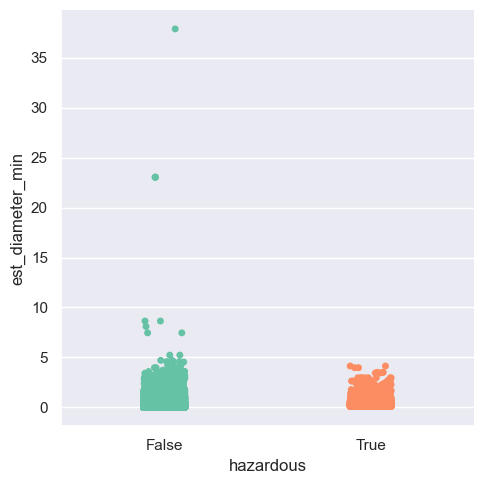

In [21]:
sns.catplot(x = "hazardous", y = "est_diameter_min", palette = "Set2", data = df)

C:\Users\TEMP.DESKTOP-1K68KDN.002\AppData\Local\Temp\ipykernel_3228\2129380272.py:1: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.catplot(x = "hazardous", y = "est_diameter_max", palette = "Set2", data = df)


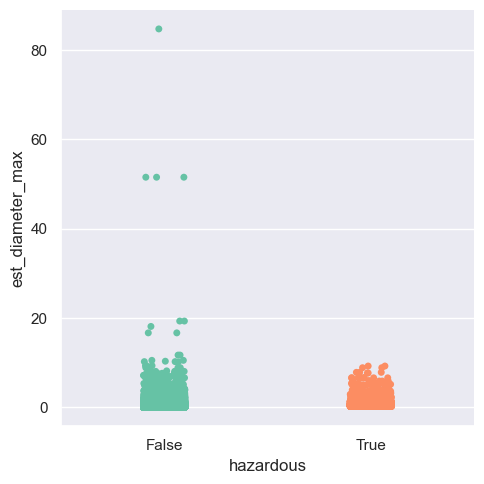

In [22]:
sns.catplot(x = "hazardous", y = "est_diameter_max", palette = "Set2", data = df)

C:\Users\TEMP.DESKTOP-1K68KDN.002\AppData\Local\Temp\ipykernel_3228\2041479392.py:1: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.catplot(x = "hazardous", y = "relative_velocity", palette = "Set2", data = df)


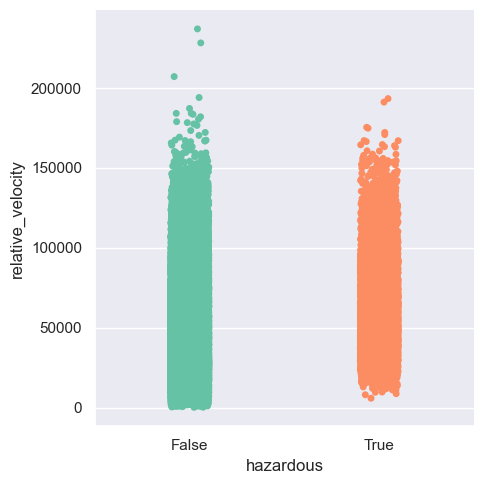

In [23]:
sns.catplot(x = "hazardous", y = "relative_velocity", palette = "Set2", data = df)

C:\Users\TEMP.DESKTOP-1K68KDN.002\AppData\Local\Temp\ipykernel_3228\871839151.py:1: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.catplot(x = "hazardous", y = "miss_distance", palette = "Set2", data = df)


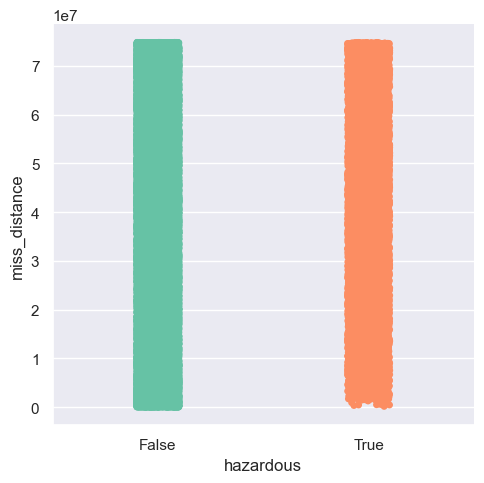

In [24]:
sns.catplot(x = "hazardous", y = "miss_distance", palette = "Set2", data = df)

C:\Users\TEMP.DESKTOP-1K68KDN.002\AppData\Local\Temp\ipykernel_3228\3979917206.py:1: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.catplot(x = "hazardous", y = "absolute_magnitude", palette = "Set2", data = df)


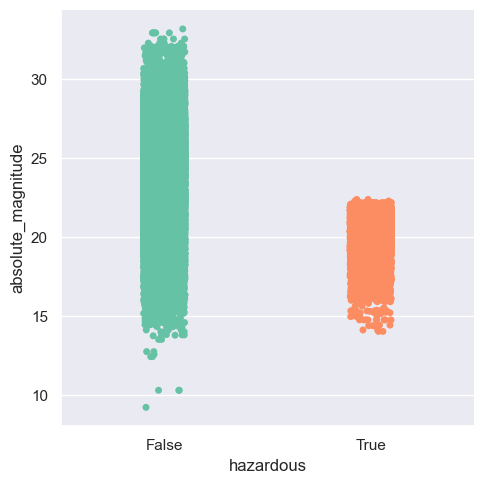

In [25]:
sns.catplot(x = "hazardous", y = "absolute_magnitude", palette = "Set2", data = df)

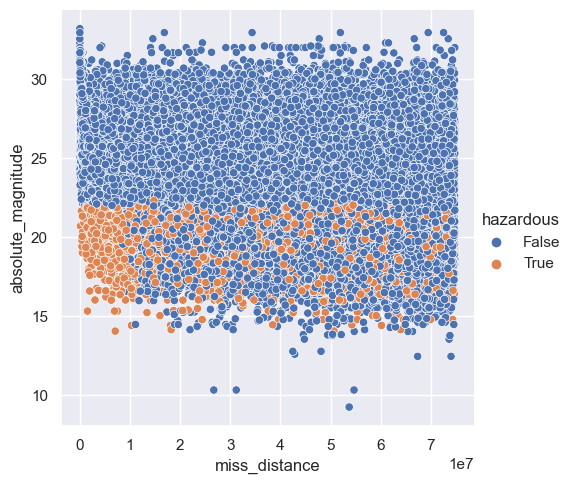

In [26]:
sns.relplot(x='miss_distance', y = 'absolute_magnitude', hue = "hazardous", data = df)

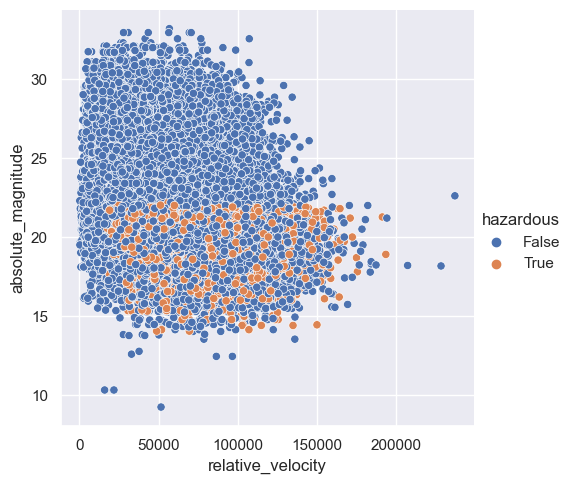

In [27]:
sns.relplot(x='relative_velocity', y = 'absolute_magnitude', hue = "hazardous", data = df)

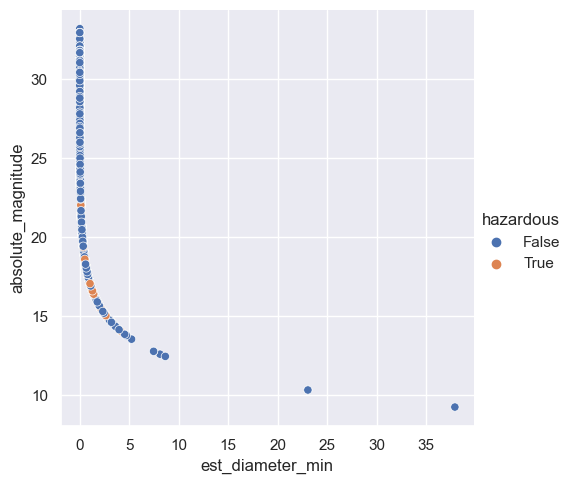

In [28]:
sns.relplot(x='est_diameter_min', y = 'absolute_magnitude', hue = "hazardous", data = df)

In [10]:
df = df.drop('id', 1)
df = df.drop('name', 1)
df = df.drop('est_diameter_min', 1)
df = df.drop('orbiting_body', 1)
df = df.drop('sentry_object', 1)

C:\Users\TEMP.DESKTOP-1K68KDN.002\AppData\Local\Temp\ipykernel_12020\3847027505.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop('id', 1)
C:\Users\TEMP.DESKTOP-1K68KDN.002\AppData\Local\Temp\ipykernel_12020\3847027505.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop('name', 1)
C:\Users\TEMP.DESKTOP-1K68KDN.002\AppData\Local\Temp\ipykernel_12020\3847027505.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop('est_diameter_min', 1)
C:\Users\TEMP.DESKTOP-1K68KDN.002\AppData\Local\Temp\ipykernel_12020\3847027505.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop('orbiting_body', 1)
C:\Us

In [11]:
X = df.iloc[:, 0:4].values
y = df.iloc[:, 4].values

In [12]:
label_encoder_hazardous = LabelEncoder()
y = label_encoder_hazardous.fit_transform(y)

In [13]:
scaler = StandardScaler()
X_standard = scaler.fit_transform(X)
X_standard[0]

array([ 3.58728394, -1.36391312,  0.79515317, -2.34863167])

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.shape, y_train.shape

((72668, 4), (72668,))

In [16]:
X_train_scaled=pd.DataFrame(scaler.fit_transform(X_train))
X_test_scaled=pd.DataFrame(scaler.transform(X_test))

In [17]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [18]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [26]:
y_pred = knn.predict(X_test)

In [31]:
knn_conf_matrix = confusion_matrix(y_test,y_pred)
knn_acc_score = accuracy_score(y_test, y_pred)
print("confussion matrix")
print(knn_conf_matrix)
print("\n")
print("Accuracy of K-NeighborsClassifier:",knn_acc_score*100,'\n')
print(classification_report(y_test,y_pred))

confussion matrix
[[16201   238]
 [ 1656    73]]


Accuracy of K-NeighborsClassifier: 89.57507705856452 

              precision    recall  f1-score   support

           0       0.91      0.99      0.94     16439
           1       0.23      0.04      0.07      1729

    accuracy                           0.90     18168
   macro avg       0.57      0.51      0.51     18168
weighted avg       0.84      0.90      0.86     18168



              precision    recall  f1-score   support

           0       0.91      0.99      0.94     16439
           1       0.23      0.04      0.07      1729

    accuracy                           0.90     18168
   macro avg       0.57      0.51      0.51     18168
weighted avg       0.84      0.90      0.86     18168



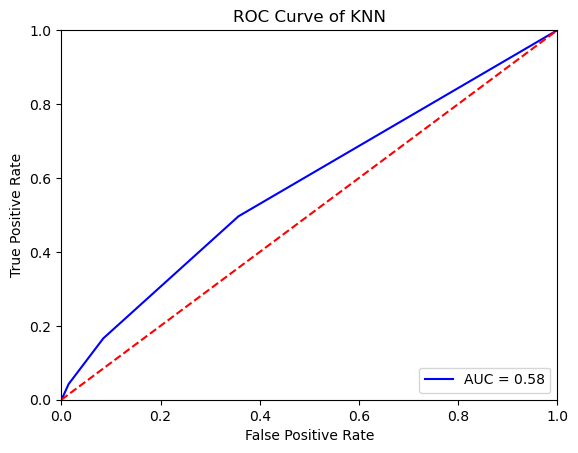

In [37]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, roc_curve, auc

knn = KNeighborsClassifier().fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred))

probs = knn.predict_proba(X_test)

unique_labels = np.unique(y_test)

fpr, tpr, threshold = roc_curve(y_test, probs[:, 1], pos_label=unique_labels[1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of KNN')
plt.show()

C:\ProgramData\anaconda3\anacondaa\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\anacondaa\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\anacondaa\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.90      1.00      0.95     16439
           1       0.00      0.00      0.00      1729

    accuracy                           0.90     18168
   macro avg       0.45      0.50      0.48     18168
weighted avg       0.82      0.90      0.86     18168



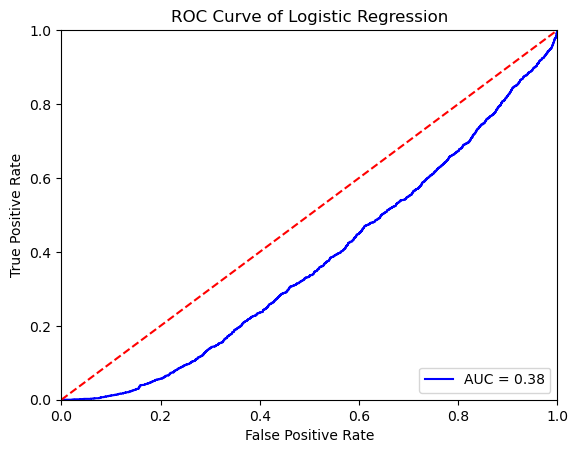

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_curve, auc

lr = LogisticRegression().fit(X_train, y_train)
y_pred = lr.predict(X_test)
print(classification_report(y_test, y_pred))

probs = lr.predict_proba(X_test)

unique_labels = np.unique(y_test)

fpr, tpr, threshold = roc_curve(y_test, probs[:, 1], pos_label=unique_labels[1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of Logistic Regression')
plt.show()

In [43]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_prediction = dt.predict(X_test)
dt_conf_matrix = confusion_matrix(y_test, y_prediction)
dt_acc_score = accuracy_score(y_test, y_prediction)
print("confussion matrix")
print(dt_conf_matrix)
print("\n")
print("Accuracy of DecisionTreeClassifier:",dt_acc_score*100,'\n')
print(classification_report(y_test,y_prediction))

confussion matrix
[[15370  1069]
 [  909   820]]


Accuracy of DecisionTreeClassifier: 89.11272567151035 

              precision    recall  f1-score   support

           0       0.94      0.93      0.94     16439
           1       0.43      0.47      0.45      1729

    accuracy                           0.89     18168
   macro avg       0.69      0.70      0.70     18168
weighted avg       0.90      0.89      0.89     18168



In [48]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_prediction = rf.predict(X_test)
rf_train_acc = round(accuracy_score(y_train,rf.predict(X_train))*100,2)
rf_test_acc = round(accuracy_score(y_test,y_prediction)*100,2)
rf_acc_score = accuracy_score(y_test, y_prediction)
print('Accuracy = ' , rf_test_acc,' %')
rf_conf_matrix = confusion_matrix(y_test, y_prediction)
print("confussion matrix")
print(rf_conf_matrix)
print("\n")
print("Accuracy of Random Forest:",rf_acc_score*100,'\n')
print(classification_report(y_test,y_prediction))

Accuracy =  92.02  %
confussion matrix
[[16013   426]
 [ 1023   706]]


Accuracy of Random Forest: 92.02443857331572 

              precision    recall  f1-score   support

           0       0.94      0.97      0.96     16439
           1       0.62      0.41      0.49      1729

    accuracy                           0.92     18168
   macro avg       0.78      0.69      0.73     18168
weighted avg       0.91      0.92      0.91     18168



In [49]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_prediction = lr.predict(X_test)
lr_train_acc = round(accuracy_score(y_train,lr.predict(X_train))*100,2)
lr_test_acc = round(accuracy_score(y_test,y_prediction)*100,2)
print('Accuracy = ',lr_test_acc ,' %')
print(classification_report(y_test,lr.predict(X_test)))
lr_conf_matrix = confusion_matrix(y_test, y_prediction)
lr_acc_score = accuracy_score(y_test, y_prediction)
print("confussion matrix")
print(lr_conf_matrix)

Accuracy =  90.48  %
              precision    recall  f1-score   support

           0       0.90      1.00      0.95     16439
           1       0.00      0.00      0.00      1729

    accuracy                           0.90     18168
   macro avg       0.45      0.50      0.48     18168
weighted avg       0.82      0.90      0.86     18168

confussion matrix
[[16439     0]
 [ 1729     0]]


C:\ProgramData\anaconda3\anacondaa\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\anacondaa\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\anacondaa\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [54]:
models = ['Logistic Regression', 'Random Forest','KNN', 'Decision Tree']
accuracies = [lr_acc_score, rf_acc_score, knn_acc_score, dt_acc_score]
result = pd.DataFrame({'Model': models, 'Accuracy': accuracies})
print(result)

                 Model  Accuracy
0  Logistic Regression  0.904833
1        Random Forest  0.920244
2                  KNN  0.895751
3        Decision Tree  0.891127
